In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os
from skimage.io import imread
import seaborn as sns

# Import files

In [2]:
if not os.path.exists('output'):
    os.makedirs('output')

# Load data
after_dir ='26_08_2021'
before_dir = '29_07_2021'

band_names = ['B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12'.split(',')]
# Load the image
image = imread(f'{before_dir}/B01_07_2021.tiff')

before_multispectral = np.dstack((  
                                    imread(f'{before_dir}/B01_07_2021.tiff'),
                                    imread(f'{before_dir}/B02_07_2021.tiff'),
                                    imread(f'{before_dir}/B03_07_2021.tiff'),
                                    imread(f'{before_dir}/B04_07_2021.tiff'),
                                    imread(f'{before_dir}/B05_07_2021.tiff'),
                                    imread(f'{before_dir}/B06_07_2021.tiff'),
                                    imread(f'{before_dir}/B07_07_2021.tiff'),
                                    imread(f'{before_dir}/B08_07_2021.tiff'),
                                    imread(f'{before_dir}/B8A_07_2021.tiff'),
                                    imread(f'{before_dir}/B09_07_2021.tiff'),
                                    imread(f'{before_dir}/B11_07_2021.tiff'),
                                    imread(f'{before_dir}/B12_07_2021.tiff')
                                    ))

after_multispectral = np.dstack((
                                    imread(f'{after_dir}/B01_08_2021.tiff'),
                                    imread(f'{after_dir}/B02_08_2021.tiff'),
                                    imread(f'{after_dir}/B03_08_2021.tiff'),
                                    imread(f'{after_dir}/B04_08_2021.tiff'),
                                    imread(f'{after_dir}/B05_08_2021.tiff'),
                                    imread(f'{after_dir}/B06_08_2021.tiff'),
                                    imread(f'{after_dir}/B07_08_2021.tiff'),
                                    imread(f'{after_dir}/B08_08_2021.tiff'),
                                    imread(f'{after_dir}/B8A_08_2021.tiff'),
                                    imread(f'{after_dir}/B09_08_2021.tiff'),
                                    imread(f'{after_dir}/B11_08_2021.tiff'),
                                    imread(f'{after_dir}/B12_08_2021.tiff')
                                    ))

# NBR

In [3]:
# Define a function for NBR analysis
def nbr_analysis(multispectral_image):
    # Calculate NBR
    nir_band = multispectral_image[:, :, 8]  # NIR band (index 8)
    swir_band = multispectral_image[:, :, 11]  # SWIR band (index 11)
    
    # Calculate NBR
    nbr = (nir_band - swir_band) / (nir_band + swir_band)

    return nbr

# Apply NBR to before and after images
before_nbr = nbr_analysis(before_multispectral)
after_nbr = nbr_analysis(after_multispectral)

# Calculate change detection
change_detection_nbr = after_nbr - before_nbr

# Plot the changes after the fire

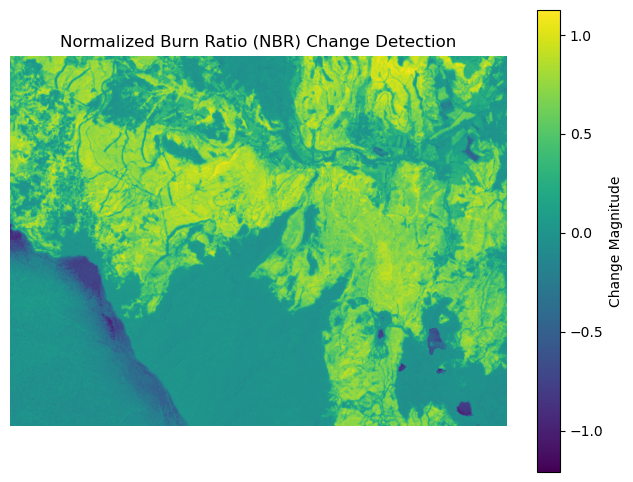

In [5]:
# Plot the NBR bands for change detection
plt.figure(figsize=(8, 6))
plt.imshow(-change_detection_nbr, cmap='viridis')
plt.title('Normalized Burn Ratio (NBR) Change Detection')
plt.colorbar(label='Change Magnitude')
plt.axis('off')
plt.savefig('output/change_detection_nbr.png', dpi=300)
plt.show()